In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


In [100]:
DATA = pd.read_csv('shades.csv')

In [101]:
DATA.shape

(625, 6)

In [102]:
DATA.head()

,hex,H,S,V,L,group
0,f3cfb3,26.0,0.26,0.95,86,2
1,ffe3c2,32.0,0.24,1.00,92,2
2,ffe0cd,23.0,0.20,1.00,91,2
3,ffd3be,19.0,0.25,1.00,88,2
4,bd9584,18.0,0.30,0.74,65,2


In [103]:
DATA.tail()

,hex,H,S,V,L,group
620,eecfba,24.0,0.22,0.93,85,7
621,e8c7b8,19.0,0.21,0.91,83,7
622,f0cbb9,20.0,0.23,0.94,85,7
623,e9c4b1,20.0,0.24,0.91,82,7
624,eabea1,24.0,0.31,0.92,80,7


In [104]:
DATA.isnull().sum()

hex       0
H        12
S        12
V        12
L         0
group     0
dtype: int64

In [105]:
DATA = DATA.fillna(' ')

In [106]:
DATA.isnull().sum()

hex      0
H        0
S        0
V        0
L        0
group    0
dtype: int64

In [107]:
DATA.describe()

,L,group
count,625.000000,625.000000
mean,65.920000,3.472000
std,17.512267,1.976529
min,11.000000,0.000000
25%,55.000000,2.000000
50%,71.000000,3.000000
75%,79.000000,5.000000
max,95.000000,7.000000


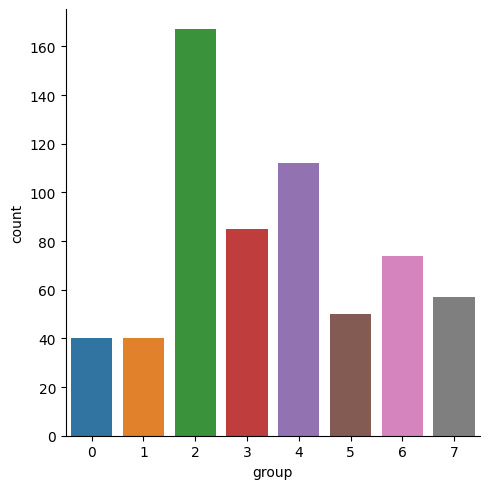

In [108]:
sns.catplot( x = 'group', data = DATA, kind = 'count')

<Axes: xlabel='group', ylabel='L'>

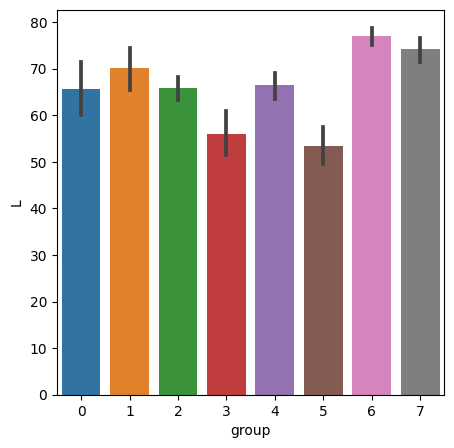

In [109]:
plot = plt.figure(figsize = (5,5))
sns.barplot(x = 'group', y = 'L', data = DATA)

<Axes: xlabel='group', ylabel='H'>

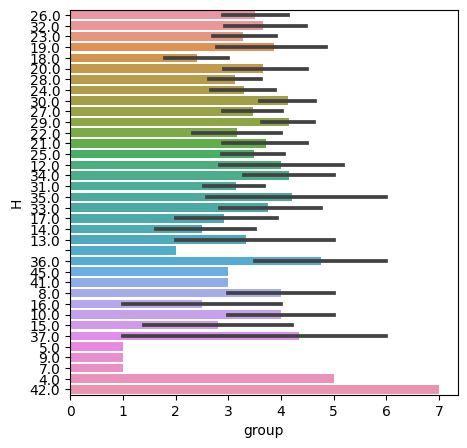

In [110]:
plot = plt.figure(figsize = (5,5))
sns.barplot(x = 'group', y = 'H', data = DATA)

<Axes: xlabel='group', ylabel='V'>

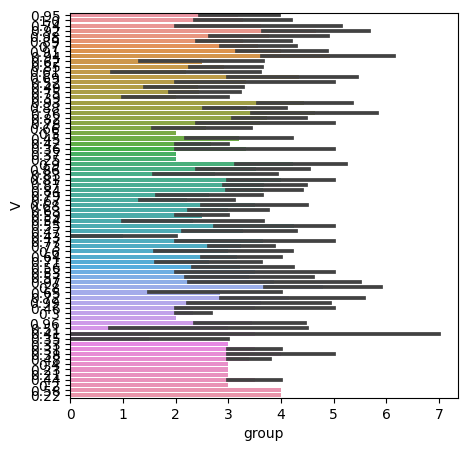

In [111]:
plot = plt.figure(figsize = (5,5))
sns.barplot(x = 'group', y = 'V', data = DATA)

<Axes: xlabel='group', ylabel='S'>

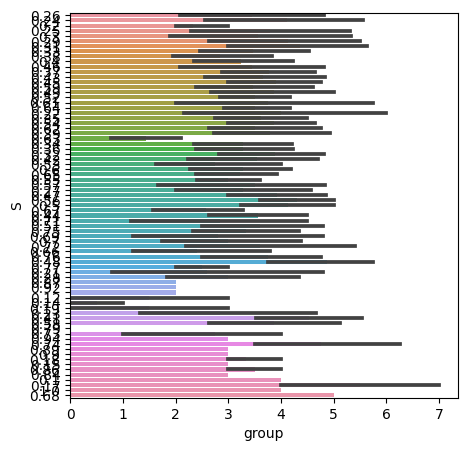

In [112]:
plot = plt.figure(figsize = (5,5))
sns.barplot(x = 'group', y = 'S', data = DATA)

In [113]:
DATA['content'] = DATA['hex']

In [114]:
print(DATA['content'])

0      f3cfb3
1      ffe3c2
2      ffe0cd
3      ffd3be
4      bd9584
        ...  
620    eecfba
621    e8c7b8
622    f0cbb9
623    e9c4b1
624    eabea1
Name: content, Length: 625, dtype: object


In [115]:
X = DATA.drop(columns = 'group' , axis = 1)
Y = DATA['group']

In [116]:
print(X)

        hex     H     S     V   L content
0    f3cfb3  26.0  0.26  0.95  86  f3cfb3
1    ffe3c2  32.0  0.24   1.0  92  ffe3c2
2    ffe0cd  23.0   0.2   1.0  91  ffe0cd
3    ffd3be  19.0  0.25   1.0  88  ffd3be
4    bd9584  18.0   0.3  0.74  65  bd9584
..      ...   ...   ...   ...  ..     ...
620  eecfba  24.0  0.22  0.93  85  eecfba
621  e8c7b8  19.0  0.21  0.91  83  e8c7b8
622  f0cbb9  20.0  0.23  0.94  85  f0cbb9
623  e9c4b1  20.0  0.24  0.91  82  e9c4b1
624  eabea1  24.0  0.31  0.92  80  eabea1

[625 rows x 6 columns]


In [117]:
print(Y)

0      2
1      2
2      2
3      2
4      2
      ..
620    7
621    7
622    7
623    7
624    7
Name: group, Length: 625, dtype: int64


In [118]:
X = DATA['content'].values
Y = DATA['group'].values

In [119]:
print(X)

['f3cfb3' 'ffe3c2' 'ffe0cd' 'ffd3be' 'bd9584' 'eabda6' 'fbd2ad' 'e2b597'
 'e4b38e' 'b2856f' 'e8ba8c' 'f3b584' 'f0b996' 'e3b082' 'eab181' '9d7359'
 'e2aa7b' 'd99358' '9c744f' 'b18b65' '84583f' '7d5631' 'c07746' '643c27'
 'edcfb9' 'e1bba7' 'c1a07e' 'd09e7c' 'c7967d' 'c09578' '9d6f48' 'a86d40'
 '7f5c3b' '735642' '6b5041' '7d5c4d' '5c4433' '5e3a23' '5e4638' '3f2018'
 'edceb2' 'f0cba1' 'ebc99c' 'e6bc94' 'dcb79a' 'eac8a3' 'e9c89e' 'd4ad8a'
 'cfa786' 'd8b08c' 'd4a97f' 'deb58b' 'dbae85' 'd5a275' 'd1a67e' 'e0ab81'
 'ca9f75' 'c69c6c' 'bd9359' 'b38355' 'ab7945' 'ab7944' 'ad7d59' 'a16c38'
 '976236' '8a5833' '8d5c31' '775436' '6e4b2f' 'ffd6ba' 'd0a26e' 'c48f56'
 'bb8046' 'ffc8a3' 'd8bba3' 'fac7a7' 'ffcba6' 'e5b593' 'dea365' 'd8a46d'
 'f2bb96' 'd4a066' 'f2bf91' 'edbe98' 'e7b79c' 'ebad81' 'ddb491' 'e5ad8a'
 'd59a71' 'cf905d' 'd69060' 'be8058' 'd7986d' 'ad7247' 'c27440' 'c0976b'
 '99562c' 'da926b' 'a35829' 'b56e38' 'a85f2a' '8f4d2b' '864f26' '8f5c35'
 '895c26' 'aa6533' '925b2d' '77421e' '724727' '7e51

In [120]:
print(Y)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 

In [121]:
vectorizer = TfidfVectorizer()
vectorizer.fit(X)

X = vectorizer.transform(X)

In [122]:
print(X)

  (0, 553)	1.0
  (1, 617)	1.0
  (2, 616)	1.0
  (3, 610)	1.0
  (4, 197)	1.0
  (5, 478)	1.0
  (6, 592)	1.0
  (7, 409)	1.0
  (8, 423)	1.0
  (9, 164)	1.0
  (10, 457)	1.0
  (11, 546)	1.0
  (12, 529)	1.0
  (13, 414)	1.0
  (14, 477)	1.0
  (15, 112)	1.0
  (16, 405)	1.0
  (17, 334)	1.0
  (18, 108)	1.0
  (19, 158)	1.0
  (20, 68)	1.0
  (21, 58)	1.0
  (22, 203)	1.0
  (23, 26)	1.0
  (24, 509)	1.0
  :	:
  (600, 491)	1.0
  (601, 310)	1.0
  (602, 579)	1.0
  (603, 593)	1.0
  (604, 448)	1.0
  (605, 361)	1.0
  (606, 438)	1.0
  (607, 493)	1.0
  (608, 522)	1.0
  (609, 491)	1.0
  (610, 545)	1.0
  (611, 30)	1.0
  (612, 154)	1.0
  (613, 190)	1.0
  (614, 212)	1.0
  (615, 373)	1.0
  (616, 513)	1.0
  (617, 450)	1.0
  (618, 362)	1.0
  (619, 532)	1.0
  (620, 519)	1.0
  (621, 463)	1.0
  (622, 534)	1.0
  (623, 472)	1.0
  (624, 480)	1.0


In [123]:
DATA.head()


,hex,H,S,V,L,group,content
0,f3cfb3,26.0,0.26,0.95,86,2,f3cfb3
1,ffe3c2,32.0,0.24,1.0,92,2,ffe3c2
2,ffe0cd,23.0,0.2,1.0,91,2,ffe0cd
3,ffd3be,19.0,0.25,1.0,88,2,ffd3be
4,bd9584,18.0,0.3,0.74,65,2,bd9584


In [124]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify=Y, random_state=2)

In [125]:
model = LogisticRegression()

model.fit(X_train, Y_train)

LogisticRegression()

In [126]:
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.716


In [127]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.272


In [129]:
X_new = X_test[90]

prediction = model.predict(X_new)
print(prediction)

if (prediction[0]==7):
  print('shade is 7')
if (prediction[0]==6):
  print('shade is 6')
if (prediction[0]==5):
  print('shade is 5')
if (prediction[0]==4):
  print('shade is 4')
if (prediction[0]==3):
  print('shade is 3')
if (prediction[0]==2):
  print('shade is 2')
if (prediction[0]==1):
  print('shade is 1')

else:
  print('shade is 0')

[2]
shade is 2
shade is 0
